## Quantitative analysis using pynance and TaLib

Import the necessary libraries

In [21]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import talib

Load and Prepare the Data

In [22]:
file_path = '../data/raw_analyst_ratings.csv'
df = pd.read_csv(file_path)

In [23]:
df['date'] = pd.to_datetime(df['date'], format='ISO8601')

In [24]:
# Identify unique stock symbols and their frequencies
symbol_freq = df['stock'].value_counts()

# Get the top 5 symbols with the highest frequency
top_5_symbols = symbol_freq.index[:5]

# Calculate date ranges for each of the top 5 stocks
date_ranges = {}
for symbol in top_5_symbols:
    symbol_data = df[df['stock'] == symbol]
    symbol_data.loc[:, 'date'] = pd.to_datetime(symbol_data['date'], format='ISO8601', utc=True)

    start_date = symbol_data['date'].min()
    end_date = symbol_data['date'].max()
    date_ranges[symbol] = (start_date, end_date)

Load stock price data into a pandas DataFrame

In [25]:
# Fetch stock prices using yfinance
stock_data = {}
for symbol, (start_date, end_date) in date_ranges.items():
    if pd.notnull(symbol):  # Check if symbol is not NaN
        ticker = yf.Ticker(str(symbol))  # Convert symbol to string just to be safe
        stock_data[symbol] = ticker.history(start=start_date, end=end_date)

In [26]:
# Apply Analysis Indicators with TA-Lib and calculate financial metrics
for symbol, data in stock_data.items():
    # Calculate technical indicators
    data['RSI'] = talib.RSI(data['Close'])
    data['MACD'], data['MACD Signal'], data['MACD Hist'] = talib.MACD(data['Close'])
    
    # Calculate financial metrics
    data['Return'] = data['Close'].pct_change()
    data['Volatility'] = data['Return'].rolling(window=20).std() * np.sqrt(20)

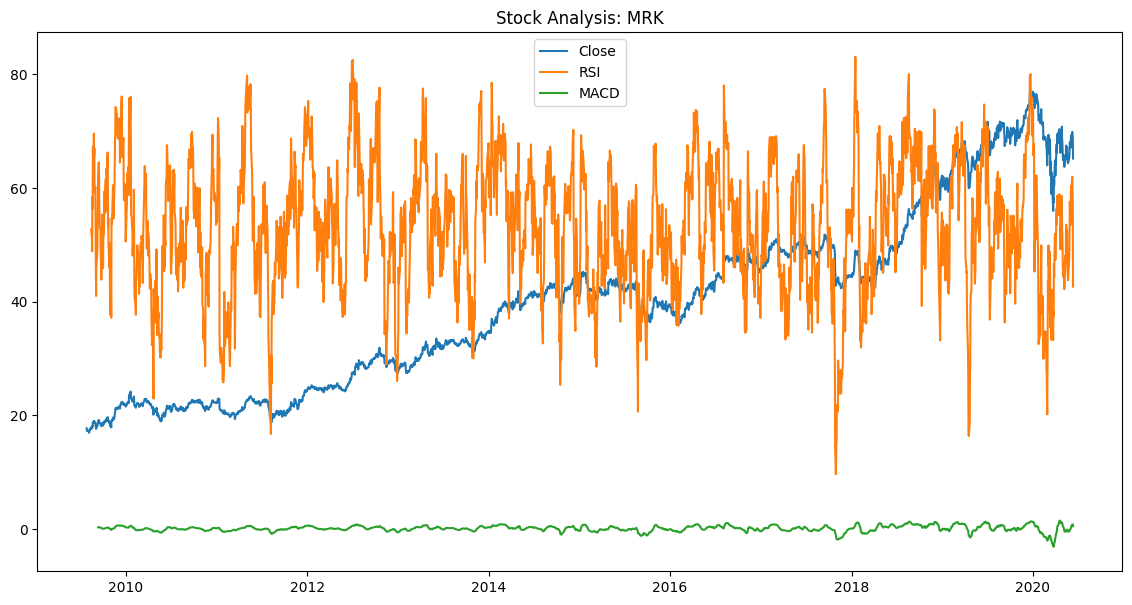

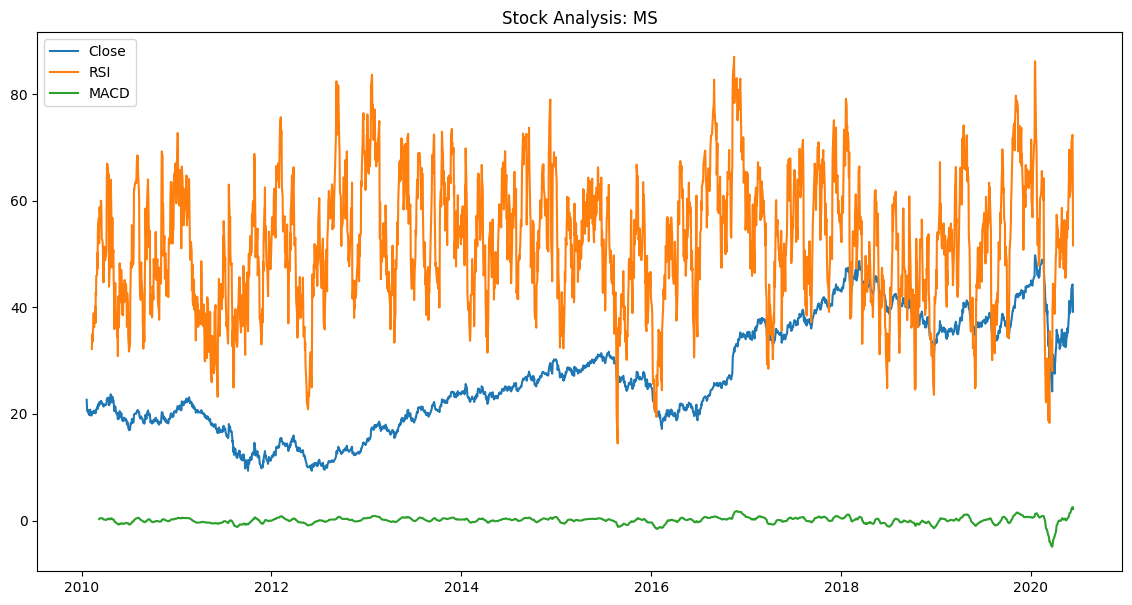

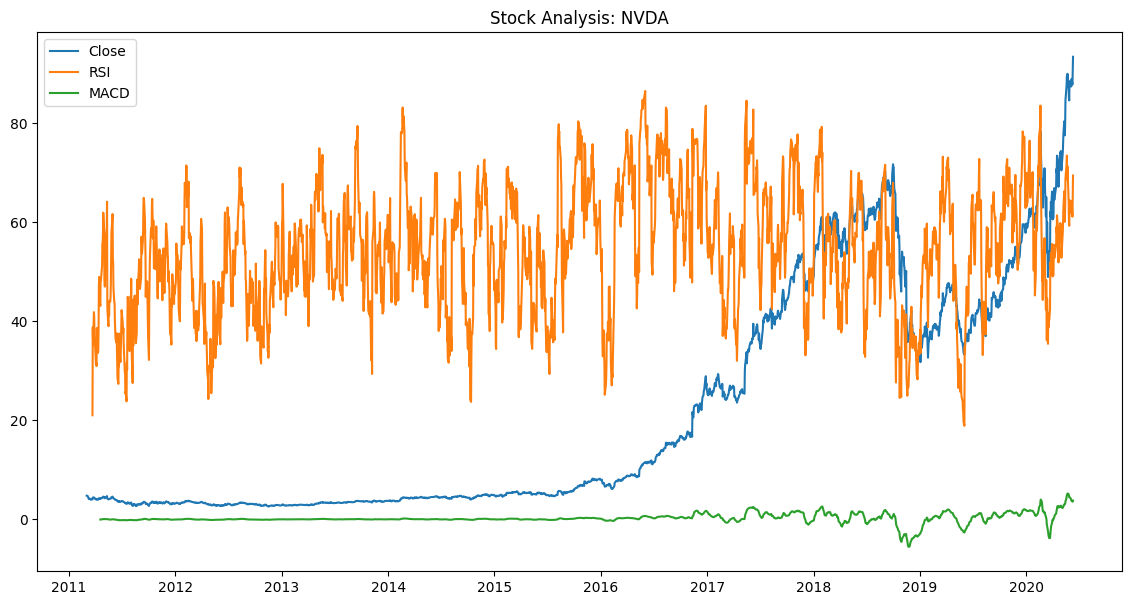

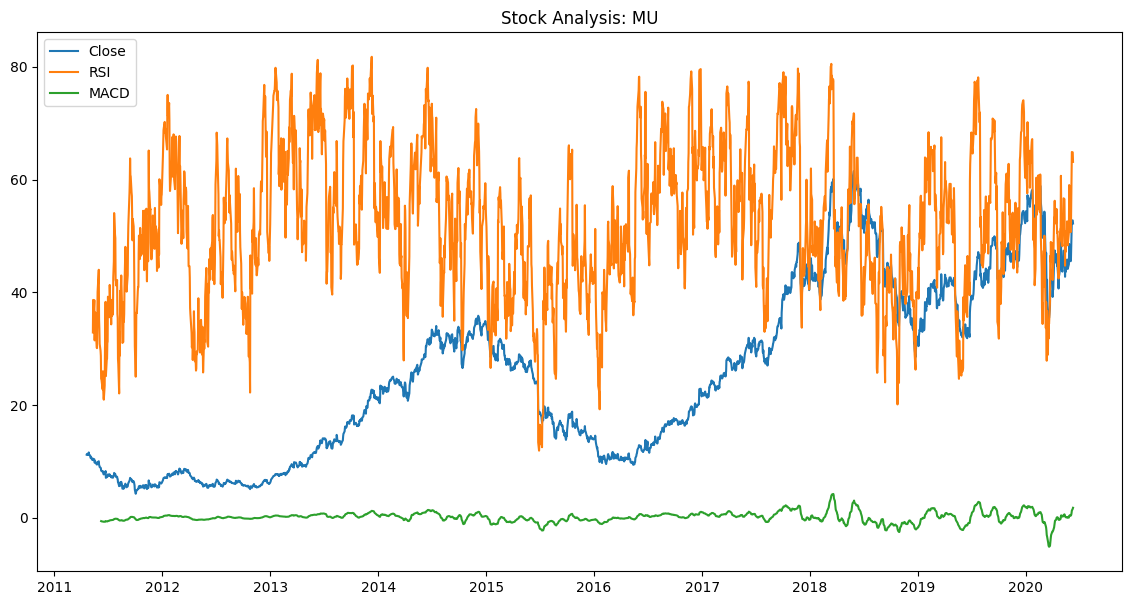

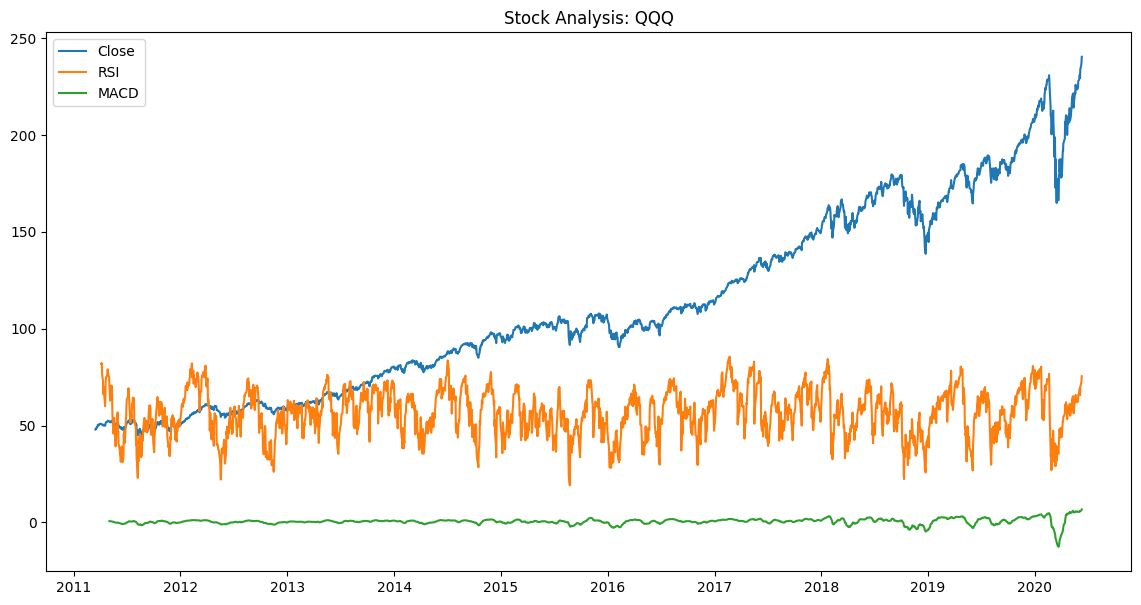

In [27]:
# Visualize the Data
for symbol, data in stock_data.items():
    # Plot closing price and technical indicators
    plt.figure(figsize=(14,7))
    plt.title(f'Stock Analysis: {symbol}')
    plt.plot(data['Close'], label='Close')
    plt.plot(data['RSI'], label='RSI')
    plt.plot(data['MACD'], label='MACD')
    plt.legend()
    plt.show()